# Hello Jeremie!

My name is Oscar Flores. I'm happy to review your project today, if you have any comments you want to add in you answers you can address to me as Oscar.

If I see a mistake in the first review, I will just point it out. I let you find it and fix it by yourself. I'm trying to prepare you to work as an Data Analyst. So, at a real job, your team lead will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the next iteration.

You will find my comments below - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

## Iteration 1: Reviewer's summary <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Hi Jeremie, the code does not run, please fix whatever library is causing this problem. It is important to note that to correctly review your project it must run on this platform, before sending please reset the kernel and run all code to see if it is working correctly.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p> Hi, Oscar. I apologize. I've used google colab for the Sprint project and uploaded the notebook in practicum. It needs to be opened at the google colab to go through the notebook. Anyway, what I'll do now is to upload the csv file in this jupyter notebook.
</div>

## Iteration 2: Reviewer's summary <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Hi Jeremie, please attend to my comments with respect to dropping the null values, this needs to be fixed in order to continue the review. I also noted other smaller errors that need to be corrected.

Cheers!
</div>

## Iteration 3: Reviewer's summary <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

Hi Jeremie, I have a 3 main comments that need correction in your work:

 - For section 2, when we are exploring what causes the null values, you should compare distributions and conclude wether, according to the table, the values are missing at random or if there is any other column that can explain why there are null values.
 - In section 2, you do not need to replace the missing values, that is done in section 3.
 - In the last section, you need to calculate a rate of late payment for different groups. Then you should compare if that rate is different among those groups or not. Also, for the column purpose, you should categorize its values so that you don't have to deal with too many different groups when analyzing the hypotheses.
    
I left more detailed comments about these changes in each section, please have a look at those.

Cheers!
</div>

## Iteration 4: Reviewer's summary <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Hi Jeremie, please check my comments about the same issues your project had the last iteration. There are some cells that don't run, please fix those.

Cheers!
</div>

# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

## Open the data file and have a look at the general information. 

In [644]:
# Loading all the libraries
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Load the data
#df = pd.read_csv('credit_scoring_eng.csv')
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

I had to edit the path because the cell wouldn't run. Please check this by resetting a kernel and running the whole project before sending it for review.
    
It is good practice to import libraries and read data in different cells. Please do that in future projects.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Please give more detailed instructions how to reset the kernel. Thank you. </p>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Update on the above comment please. Thank you. </p>

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

In [645]:
def check_data_stuff(df):
  print("Dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
  print('\n*********************************')
  print(df.describe())
  print('\n *********************************')
  print(df.shape)

check_data_stuff(df)

Dataframe has 21525 rows and 12 columns

*********************************
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt   total_income  
count      21525.000000  21525.000000   19351.000000  
mean           0.972544      0.080883   26787.568355  
std            1.420324      0.272661   16475.450632  
min            0.000000      0.000000    3306.762000  
25%            0.000000      0.000000   16488.504500  


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

Instead of using print, use display, it shows a prettier output that has a better format.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>It's my first time to encounter using display. Neither the tutor or the module mentioned this. But I'll take note of this.</p>

In [646]:
df.head(10)



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [647]:
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated
21516,0,-914.391429,42,bachelor's degree,0,married,0,F,business,0,51649.244,purchase of my own house
21517,0,-404.679034,42,bachelor's degree,0,civil partnership,1,F,business,0,28489.529,buying my own car
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


Observations:
<p>The days_employed column contain negative values. It needs to be investigated further. The entries in education column are inconsistent with the cases. Some are in lower case while the rest are in uppoer case. Education_id and family_status_id seems to show responses in various scale. Values in the Debt column seems to be Boolean. There's Nan in a single row which shows that there are duplicate values.</p>  

In [648]:
df.info(show_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [649]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [650]:
def check_data_category(df):
  print(df['education'].sort_values().unique())
  print('\n*********************************')
  print(df['gender'].sort_values().unique())
  print('\n *********************************')
  print(df['education'].sort_values().unique())
  print('\n *********************************')
  print(df['family_status'].sort_values().unique())
  print('\n *********************************')
  print(df['income_type'].sort_values().unique())
  print('\n *********************************')
  print(df['purpose'].sort_values().unique())

check_data_category(df)

["BACHELOR'S DEGREE" "Bachelor's Degree" 'GRADUATE DEGREE'
 'Graduate Degree' 'PRIMARY EDUCATION' 'Primary Education'
 'SECONDARY EDUCATION' 'SOME COLLEGE' 'Secondary Education' 'Some College'
 "bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']

*********************************
['F' 'M' 'XNA']

 *********************************
["BACHELOR'S DEGREE" "Bachelor's Degree" 'GRADUATE DEGREE'
 'Graduate Degree' 'PRIMARY EDUCATION' 'Primary Education'
 'SECONDARY EDUCATION' 'SOME COLLEGE' 'Secondary Education' 'Some College'
 "bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']

 *********************************
['civil partnership' 'divorced' 'married' 'unmarried' 'widow / widower']

 *********************************
['business' 'civil servant' 'employee' 'entrepreneur'
 'paternity / maternity leave' 'retiree' 'student' 'unemployed']

 *********************************
['building a property' 'buildin

In [651]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe().transpose()

,count,unique,top,freq
education,21525,15,secondary education,13750
family_status,21525,5,married,12380
gender,21525,3,F,14236
income_type,21525,8,employee,11119
purpose,21525,38,wedding ceremony,797


In [652]:
numCol  = df.dtypes[df.dtypes != "0"].index
df[numCol].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19351.0,26787.568355,16475.450632,3306.762000,16488.504500,23202.870000,32549.611000,362496.645000


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Good use of describe
</div>

In [653]:
for d in df.columns:
  print(d)
  print(df[d].value_counts())
  print('\n**********************************\n')

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**********************************

days_employed
-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

**********************************

dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71 

In [654]:
df.isnull().sum().sort_values(ascending=False)

days_employed       2174
total_income        2174
children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
purpose                0
dtype: int64

Observations: 
<p> 1. Using the .describe () method, we can see that the count in some columns are inconsistent. There are missing values in columns days_employed and total_income. Based on previous observations, there are also duplicated values and other discrepancies in the columns.</p>
<p> 2. Both days_employed and total_income have exactly the same number of missing values. At present, I don't see if both correlates to one another. Although, since the aim is to find out the likelihood customers can default on their loan applications, total_income can affect the result. Credit score depends on the financial capability of the customers.</p>  

In [655]:
df.value_counts()


children  days_employed   dob_years  education            education_id  family_status      family_status_id  gender  income_type    debt  total_income  purpose                                 
-1        -9851.184337    44         secondary education  1             divorced           3                 F       employee       0     17758.530     to own a car                                1
 1        -7117.338200    42         secondary education  1             married            0                 F       civil servant  0     36511.880     housing renovation                          1
          -7137.319761    35         secondary education  1             married            0                 F       employee       0     20696.434     property                                    1
          -7146.299384    50         bachelor's degree    0             married            0                 F       employee       0     16782.180     housing transactions                        1
          -7152

In [656]:
df.mean()

children                0.538908
days_employed       63046.497661
dob_years              43.293380
education_id            0.817236
family_status_id        0.972544
debt                    0.080883
total_income        26787.568355
dtype: float64

In [657]:
df.median()

children                0.000000
days_employed       -1203.369529
dob_years              42.000000
education_id            1.000000
family_status_id        0.000000
debt                    0.000000
total_income        23202.870000
dtype: float64

**Intermediate conclusion**

The number of rows in the filtered table match the number of missing values. The values could be erroneous but still considered as values due to their data type.  

Next steps to check and investigate further the columns with the missing values. 

In [658]:
round(10* (df.isnull().sum() / len(df)*10)).sort_values(ascending=False)

days_employed       10.0
total_income        10.0
children             0.0
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
purpose              0.0
dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, this tells us that 10% of data is missing.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

I'm not sure if this is meaningful or not. Please explain what are you concluding from this.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>The instruction says to get the percentage of the missing values. I'm not sure if its the right step at this point also. </p>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

What I meant was that the first code is correct, but I think the second is wrong. In the second one, you are showing along axis=1 which is summing each row, and then dividing by the total number of rows. The instructions refer to getting the percentages you did in the first block.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Ok. So, is this resolved then? </p>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Yes, the main problem is resolved since you are no longer using the code that was wrong.
</div>

The missing values are both the same number in th columns, days_employed and total_income.  

In [659]:
df.columns[df.isnull().any()]

Index(['days_employed', 'total_income'], dtype='object')

In [660]:
df.columns[df.isnull().any()]

Index(['days_employed', 'total_income'], dtype='object')

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Please don't drop these null values, they are 10% of the total data, which is a lot. In this section you have to see if there is any special relationship between the missing values and other columns. I'm not sure if the base idea is clear, so I will explain that:
    
Imagine that in all the population without nulls, 50% of the records are of category employee, 25% are business amd 25% are retiree. Then, when we look at the population that has null value in total_income and days_employed, we should find a similar distribution in those percentages. What if, we find that 90% of the records are of business category. Then, we would be right in saying that there is some problem with people that have income_type business and it is causing people from that category to have null values in the total_income and days_employed variables.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>As instructed, I didn't drop the null values. I replaced them with the mean value. </p>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

Nice, now you didn't drop the null values, but in this section, we do not need to replace them, that will be done in subsections of section 3, where we restore missing values in those columns. For this sections you should do the following:
    
 - Create 2 dataframes from the data `df`: One dataframe with only the rows of `df` that have null values in columns total_income and days_employed and other dataframe with the rest of the data of `df` (i.e. rows without null values)
 - For each datafram: Get the percentage distribution of one column, dob_years for example. (you can do this by applying to the dataframe the method .value_counts(normalize=True))
 - Compare those distributions. Check if they are very different or similar.
  
The idea of this section is to see that if the null values we have here are caused by random or can be explained by another variable in the data (in the example above, when we compare the distribution of dob_years, we try to see if the values of dob_years have anything to do with the missing data)
</div>


In [661]:
df_null_values = df[['total_income', 'days_employed']]

In [662]:
df_no_null_values = df[['children', 'dob_years', 'education', 'education_id','family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'purpose']].isnull()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Please fix this cell, it doesn't run.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>After creating two dataframes and calculating the percentage distribution, the distribution are not similar. This could mean that the columns with no missing values don't affect the columns with the missing values. </p>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Note that the dataframe df_null_values only has boolean values, what you have to do is get the data from table df, with the corresponding values in the other columns. Take a look at this code:
    
 - `data_nan = df[df['days_employed'].isnull()]`
 - `data_nan['income_type'].value_counts(normalize = True)`
    
This will show us the behaviour of rows with nulls with regard to the income_type variable. If you do the same for non null values, we will get the behvaiour of rows without nulls. Then we will be able to compare those and notice if there is something special about those 2 distributions.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Do you mean total_income? income type is a string. it gives an error when applying the code above.</p>

In [663]:
df['days_employed'].isnull().sum()

2174

In [664]:
df['total_income'].isnull().sum()

2174

In [665]:
data_nan = df[df['days_employed'].isnull()]
data_nan['total_income'].value_counts(normalize = True)

Series([], Name: total_income, dtype: float64)

In [666]:
df_no_null_values['income_type'].value_counts(normalize = True)

False    1.0
Name: income_type, dtype: float64

In [667]:
df['days_employed'].isnull().sum()

2174

In [668]:
df['total_income'].isnull().sum()

2174

## Data transformation


In [669]:
print(df.duplicated().sum())

54


In [670]:
df.drop_duplicates(keep=False, inplace=True)

In [671]:
print(df.duplicated().sum())

0


**Checking the education attainment of the loan applicants.**

In [672]:
df['education'].value_counts()

secondary education    13662
bachelor's degree       4702
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        272
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [673]:
df['education'].sort_values().unique() 


array(["BACHELOR'S DEGREE", "Bachelor's Degree", 'GRADUATE DEGREE',
       'Graduate Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education',
       'Some College', "bachelor's degree", 'graduate degree',
       'primary education', 'secondary education', 'some college'],
      dtype=object)

In [674]:
def replace_wrong_education(wrong_education, correct_education): 
    for wrong_educ in wrong_education: 
        df['education'] = df['education'].replace(wrong_educ, correct_education)



In [675]:
duplicates = ["BACHELOR\'S DEGREE", "Bachelor\'s Degree"] 
name = 'bachelor\'s degree'
replace_wrong_education(duplicates, name)
duplicates = ["GRADUATE DEGREE", "Graduate Degree"] 
name = 'graduate degree'
replace_wrong_education(duplicates, name)
duplicates = ["PRIMARY EDUCATION", "Primary Education"] 
name = 'primary education'
replace_wrong_education(duplicates, name)
duplicates = ["SECONDARY EDUCATION", "Secondary Education"] 
name = 'secondary education'
replace_wrong_education(duplicates, name)
duplicates = ["SOME COLLEGE", "Some College"] 
name = 'some college'
replace_wrong_education(duplicates, name)

In [676]:
print(df['education'].sort_values().unique())

["bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok, this is correct. Also, you could've done `df['education'] = df['education'].str.lower()`
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Noted on further exercises. </p>

In [677]:
df.shape

(21419, 12)

In [678]:
df['education']

0          bachelor's degree
1        secondary education
2        secondary education
3        secondary education
4        secondary education
                ...         
21520    secondary education
21521    secondary education
21522    secondary education
21523    secondary education
21524    secondary education
Name: education, Length: 21419, dtype: object

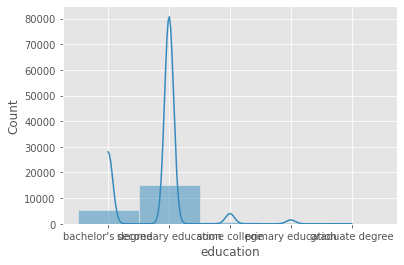

In [679]:
import seaborn as sns
sns.histplot(x=df['education'], bins=10, kde=True);

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good, showing the distribution with plots is nice.
</div>

**Checking the number of children of the loan applicants.**

In [680]:
df['days_employed'].isnull().sum()

2068

In [681]:
df['children'].value_counts()


 0     14067
 1      4800
 2      2049
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

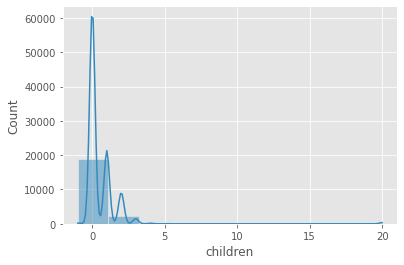

In [682]:
sns.histplot(x=df['children'], bins=10, kde=True);

In [683]:
df[df['children'] == 20].shape

(76, 12)

In [684]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,secondary education,1,married,0,M,business,0,23253.578,purchase of the house
720,20,-855.595512,44,secondary education,1,married,0,F,business,0,18079.798,buy real estate
1074,20,-3310.411598,56,secondary education,1,married,0,F,employee,1,36722.966,getting an education
2510,20,-2714.161249,59,bachelor's degree,0,widow / widower,2,F,employee,0,42315.974,transactions with commercial real estate
2941,20,-2161.591519,0,secondary education,1,married,0,F,employee,0,31958.391,to buy a car
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240.257910,40,secondary education,1,married,0,F,employee,1,21363.842,to own a car
21325,20,-601.174883,37,secondary education,1,married,0,F,business,0,16477.771,profile education
21390,20,NaN,53,secondary education,1,married,0,M,business,0,NaN,buy residential real estate
21404,20,-494.788448,52,secondary education,1,married,0,M,business,0,25060.749,transactions with my real estate


In [685]:
df['children'] = df['children'].replace([20], 2)

In [686]:
df[df['children'] == 20].shape

(0, 12)

In [687]:
df['children'].value_counts()

 0    14067
 1     4800
 2     2125
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64

In [688]:
df[df['children'] == -1].shape

(47, 12)

In [689]:
df[df['children'] == -1]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,secondary education,1,civil partnership,1,F,employee,0,16450.615,profile education
705,-1,-902.084528,50,secondary education,1,married,0,F,civil servant,0,22061.264,car purchase
742,-1,-3174.456205,57,secondary education,1,married,0,F,employee,0,10282.887,supplementary education
800,-1,349987.852217,54,secondary education,1,unmarried,4,F,retiree,0,13806.996,supplementary education
941,-1,NaN,57,secondary education,1,married,0,F,retiree,0,NaN,buying my own car
1363,-1,-1195.264956,55,secondary education,1,married,0,F,business,0,11128.112,profile education
1929,-1,-1461.303336,38,secondary education,1,unmarried,4,M,employee,0,17459.451,purchase of the house
2073,-1,-2539.761232,42,secondary education,1,divorced,3,F,business,0,26022.177,purchase of the house
3814,-1,-3045.290443,26,secondary education,1,civil partnership,1,F,civil servant,0,21102.846,having a wedding
4201,-1,-901.101738,41,secondary education,1,married,0,F,civil servant,0,36220.123,transactions with my real estate


In [690]:
df['children'] = df['children'].replace([-1], 1)

In [691]:
df[df['children'] == -1].shape

(0, 12)

In [692]:
df['children'].value_counts()

0    14067
1     4847
2     2125
3      330
4       41
5        9
Name: children, dtype: int64

Observations:
<p>In the children column, there are values with negative values (-1) and 20. This could be a human error of putting in the correct values which are 1 and 2 respectively. Thus, I replaced those incorrect values with the right ones.</p> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good!
</div>

In [693]:
df['children']


0        1
1        1
2        0
3        3
4        0
        ..
21520    1
21521    0
21522    1
21523    3
21524    2
Name: children, Length: 21419, dtype: int64

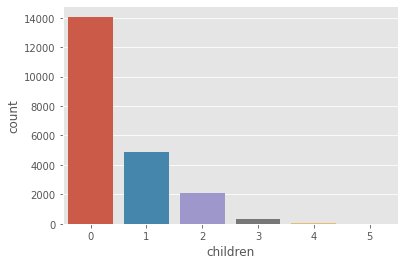

In [694]:
sns.countplot('children', data =df)
plt.show()

**Checking the 'days_employed' column.**
</p>The main issues will be the length of days the customers were employed. Its a float, so, it can only mean some worked less than a day. But when cross-referencing it with income_type column which shows values of student, retired... it needs to be investigated. The income_type column could have impact to the days_employed column.</p>


In [695]:
print(df.head(10))

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  secondary education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   
5         0    -926.185831         27    bachelor's degree             0   
6         0   -2879.202052         43    bachelor's degree             0   
7         0    -152.779569         50  secondary education             1   
8         2   -6929.865299         35    bachelor's degree             0   
9         0   -2188.756445         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

In [696]:
df['days_employed'].describe()


count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [697]:
df['days_employed'].isnull().sum() / len(df['days_employed']) * 100

9.65497922405341

**Observations:**
Looking at the statistics table, the max value is 401755 which is impossible as the number of days in the working age of an individual as well as the min value as negative. It needs to be further investigated. 

In [698]:
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x) if x < 0 else x)
df['days_employed'].describe()


count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

In [699]:
df['days_employed'].sort_values(ascending=False)

6954     401755.400475
10006    401715.811749
7664     401675.093434
2156     401674.466633
7794     401663.850046
             ...      
21489              NaN
21495              NaN
21497              NaN
21502              NaN
21510              NaN
Name: days_employed, Length: 21419, dtype: float64

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
1%          113.426296
10%         385.009877
25%         927.009265
50%        2194.220567
75%        5537.882441
99%      397588.993236
max      401755.400475
Name: days_employed, dtype: float64



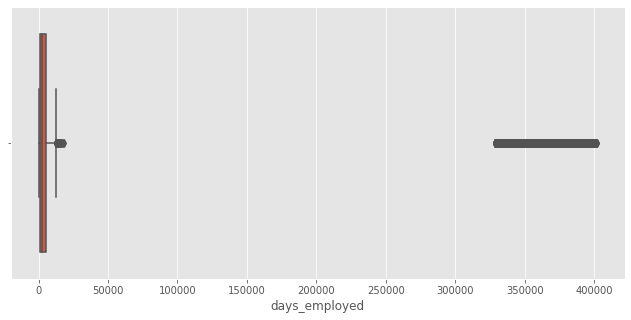

In [700]:
print(df['days_employed'].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=(11,5))
sns.boxplot(df['days_employed'])
plt.show()

In [701]:
df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


In [702]:
outlier_index = df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)].index

In [703]:
df['days_employed'].sort_values(ascending=False)

6954     401755.400475
10006    401715.811749
7664     401675.093434
2156     401674.466633
7794     401663.850046
             ...      
21489              NaN
21495              NaN
21497              NaN
21502              NaN
21510              NaN
Name: days_employed, Length: 21419, dtype: float64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice to show the distribution of the days_employed column, but how can you fix those very large values?
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Noting that the extreme values of days_employed, I scaled those values using log(x) and separating them as another column. I will use this column in further EDA processing. </p>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Ok, the log transformation allow us to see better a distribution with small and very large values, it is an aide to see distribution plots. But the problem is with the data itself, the value 401755 days implies many years of work, more than 1000! So, we need to fix those values, maybe discard them.
</div>

In [704]:
df.drop(outlier_index, inplace=True)

In [705]:
print(df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>As instructed, I discarded the outliers in days_employed column. </p>

#df['log_of_days_employed'] = [np.log(x) for x in df['days_employed']]
#print(df[(df['days_employed'] >= 300000) & (df['days_employed']<=450000)])

**Checking the 'dob_years' column.**

In [706]:
df['dob_years'].value_counts()


35    614
41    599
40    598
34    596
38    588
42    586
33    579
39    567
31    557
36    550
29    543
30    536
44    533
37    530
48    516
32    505
43    502
28    502
27    490
45    486
49    478
47    462
46    458
50    451
26    406
52    389
51    375
25    357
53    354
54    328
56    297
55    281
24    264
23    252
58    243
57    240
59    188
22    182
61    139
60    128
62    112
21    111
0      84
64     80
63     77
65     58
20     51
66     42
67     35
68     19
19     14
70     11
69     11
71     10
72      5
74      2
73      2
75      1
Name: dob_years, dtype: int64

In [707]:
df[df['dob_years'] == 0]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
1149,0,934.654854,0,secondary education,1,married,0,F,business,0,32296.389,buy real estate
1386,0,5043.219890,0,bachelor's degree,0,married,0,M,civil servant,0,38483.779,purchase of a car
...,...,...,...,...,...,...,...,...,...,...,...,...
18851,0,10637.001569,0,secondary education,1,married,0,F,civil servant,0,21845.941,supplementary education
19371,1,2356.250615,0,bachelor's degree,0,married,0,F,business,0,12469.795,car
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


In [708]:
df['dob_years'].describe()

count    17974.000000
mean        40.226104
std         10.952290
min          0.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         75.000000
Name: dob_years, dtype: float64

**Observations**
<p>It's better to drop the rows with 0 values since its impossible to think clients have no age. This is clearly a human error but there's no way of knowing what's the correct input of these zero ages.</p> 

In [709]:
index = df[(df['dob_years'] >= 100)|(df['dob_years'] <= 18)].index
df.drop(index, inplace=True)
df['dob_years'].describe()

count    17890.000000
mean        40.414980
std         10.624597
min         19.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         75.000000
Name: dob_years, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok this is correct, but you should've also explained why are you discarding people with 18 years or lower
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Since we are processing loan applicants with financial history as well as financial capability, discarding 18 years old and below is necessary to trim loan applicants.</p>

In [710]:
df.loc[98:100, :]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
100,0,605.026441,49,secondary education,1,widow / widower,2,F,employee,1,28221.581,real estate transactions


In [711]:
print(df[df['dob_years'] == 0])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


**Check the `family_status` column**

In [712]:
df['family_status'].value_counts()

married              10396
civil partnership     3551
unmarried             2482
divorced               988
widow / widower        473
Name: family_status, dtype: int64

Observations: No issues. Data seems solid and believable with the categories.

**Checking the 'gender' column.**

In [713]:
df['gender'].value_counts()

F      11281
M       6608
XNA        1
Name: gender, dtype: int64

**Observations.**
<p> The value XNA is erroneous. Either the loan applicant prefers not to disclose the gender or some human error, it should be corrected. Slicing the dataframe to investigated, it looks like the loan applicant is Female. Thus, I converted the erroneous value to F. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>


Please state the reason to why do you think the applicant is Female
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>The profile for XNA seems female, with a relationship and intends to take a loan to buy housing for family purposes.</p>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>


Ok, that might be a reason, but it should be better justified by the data we observe. For example, it is likely that this applicant is Female, because F is the mode value.
</div>

In [714]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [715]:
df['gender'] = df['gender'].apply(lambda x: 'F' if x == 'XNA' else x)
df['gender'].value_counts()

F    11282
M     6608
Name: gender, dtype: int64

In [716]:
df.loc[10701, 'gender']



'F'

**Check the `income_type` column.**

In [717]:
# Let's see the values in the column
df['income_type'].value_counts()

employee                       11009
business                        5055
civil servant                   1449
retiree                          373
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [718]:
# Address the problematic values, if they exist
df['income_type'].isnull().sum() / len(df['income_type']) * 100

0.0

In [719]:
df[df['income_type'] == 'paternity / maternity leave']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20845,2,3296.759962,39,secondary education,1,married,0,F,paternity / maternity leave,1,8612.661,car


In [720]:
df['income_type'] = df['income_type'].apply(lambda x: 'employee' if x == 'paternity / maternity leave' else x)

In [721]:
print(df[df['income_type'] == 'paternity / maternity leave'])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good
</div>

**Checking Duplicates**

In [722]:
def check_duplicate(df):
    if df.duplicated().sum():
        return  'There are Duplicate Data.' 
    else :
        return 'Data is clean. No Duplicate Data Found.'

In [723]:
check_duplicate(df)

'There are Duplicate Data.'

In [724]:
df.drop_duplicates(keep=False, inplace=True)

In [725]:
def check_duplicate(df):
    if df.duplicated().sum():
        return  'There are Duplicate Data.' 
    else :
        return 'Data is clean. No Duplicate Data Found.'

In [726]:
check_duplicate(df)

'Data is clean. No Duplicate Data Found.'

In [727]:
df.shape

(17861, 12)

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17861 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17861 non-null  int64  
 1   days_employed     15832 non-null  float64
 2   dob_years         17861 non-null  int64  
 3   education         17861 non-null  object 
 4   education_id      17861 non-null  int64  
 5   family_status     17861 non-null  object 
 6   family_status_id  17861 non-null  int64  
 7   gender            17861 non-null  object 
 8   income_type       17861 non-null  object 
 9   debt              17861 non-null  int64  
 10  total_income      15832 non-null  float64
 11  purpose           17861 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


**Observations**
<p> The original dataframe has inconsistent values with 21525 entries and 12 columns. The columns days_employed and total_income have the same number of missing values. After correcting for missing values, duplicates, dropping and replacing erroneous errors, the filtered dataframe have now 21289 entries and 13 columns including the log(x) of days_employed containing the scaled values of days_employed.  

# Working with missing values

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

In this section you'll have to replace the missing values of the dataframe with some representing values of the column where the null values are. For example, for `total_income` look at what is the income distribution for values depending on the education level, and then you could replace the null values of the dataframe by the mean of the corresponding education level. For example, if a row has education level graduate and also has a total_income null value, you could replace that null with the total_income mean (or median) of all the rows which also have education level graduate.
</div>

### Restoring missing values in `total_income`

In [729]:
df['total_income'].isnull().sum()

2029

<AxesSubplot:xlabel='total_income', ylabel='Density'>

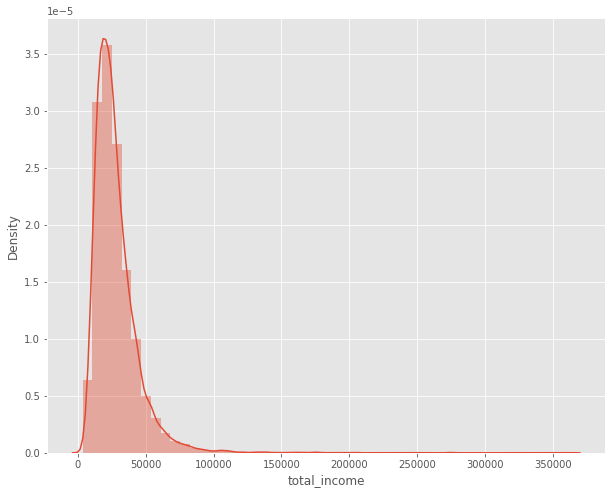

In [730]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df.total_income)

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>Since the data is skewed in the total_income column, it's best to use median values to fill in the missing values.  </p>

In [731]:
df['total_income'].isnull().sum()

2029

In [732]:
df['days_employed'].isnull().sum()

2029

In [733]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

In [734]:
df['total_income'].isnull().sum()

0

In [735]:
total_income_education = df.groupby(['education'])['total_income'].aggregate('mean')
print(total_income_education)

education
bachelor's degree      32815.858427
graduate degree        27772.929500
primary education      23122.746484
secondary education    25352.655576
some college           28908.006088
Name: total_income, dtype: float64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Good, it is with a dataframe like this that you can replace null values in the main dataframe df.
</div>

**Categorizing Age Group**

In [736]:
def age_group(dob_years):
    if dob_years <= 18:
        return 'Child'
    if dob_years <= 64:
        return 'Adult'
    return 'Retired'    

In [737]:
print(age_group(20)) 

Adult


In [738]:
df['age_group'] = df['dob_years'].apply(age_group)
print(df.head(10)) 

    children  days_employed  dob_years            education  education_id  \
0          1    8437.673028         42    bachelor's degree             0   
1          1    4024.803754         36  secondary education             1   
2          0    5623.422610         33  secondary education             1   
3          3    4124.747207         32  secondary education             1   
5          0     926.185831         27    bachelor's degree             0   
6          0    2879.202052         43    bachelor's degree             0   
7          0     152.779569         50  secondary education             1   
8          2    6929.865299         35    bachelor's degree             0   
9          0    2188.756445         41  secondary education             1   
10         2    4171.483647         36    bachelor's degree             0   

        family_status  family_status_id gender income_type  debt  \
0             married                 0      F    employee     0   
1             ma

In [739]:
grouped = pd.pivot_table(data=df, index='age_group', values='dob_years', aggfunc='count')
print(grouped)

           dob_years
age_group           
Adult          17670
Retired          191


In [740]:
grouped1 = pd.pivot_table(data=df, index='age_group', values='total_income', aggfunc='median')
print(grouped1)

           total_income
age_group              
Adult        24178.6145
Retired      24178.6145


**Observations:**
<p> There are more than 95% loan applicants who are adults than retired. Adults are more able to pay back their loan rather than retired. However, looking at the total income of the age group, the retired loan applicants are close to adult loan applicants which means the retired loan applicants are capable of paying back their loan. 

In [741]:
df['total_income'].head(10)

0     40620.102
1     17932.802
2     23341.752
3     42820.568
5     40922.170
6     38484.156
7     21731.829
8     15337.093
9     23108.150
10    18230.959
Name: total_income, dtype: float64

In [742]:
df['total_income'].describe()


count     17861.000000
mean      27429.210979
std       16049.729481
min        3418.824000
25%       18117.570000
50%       24178.614500
75%       32073.554000
max      362496.645000
Name: total_income, dtype: float64

In [743]:
df1 = df[categorical]
df1.head()

,education,family_status,gender,income_type,purpose
0,bachelor's degree,married,F,employee,purchase of the house
1,secondary education,married,F,employee,car purchase
2,secondary education,married,M,employee,purchase of the house
3,secondary education,married,M,employee,supplementary education
5,bachelor's degree,civil partnership,M,business,purchase of the house


**Grouping Categorical Columns with Total_Income**
<p> To find out if there is a correlation of some of the categorical columns to total_income, I used groupby and get their mean and median values.</p>

In [744]:
df_groupby = df.groupby(['gender','education','family_status'])['total_income'].aggregate('mean').unstack()
print(df_groupby)

family_status               civil partnership      divorced       married  \
gender education                                                            
F      bachelor's degree         30018.709774  31121.318789  29858.378287   
       graduate degree                    NaN           NaN  17822.757000   
       primary education         24196.561140  21138.597667  20250.798402   
       secondary education       23688.352027  25012.872620  22989.529008   
       some college              26045.029289  35048.278818  26720.982020   
M      bachelor's degree         37803.183107  38952.989212  39760.550431   
       graduate degree                    NaN  18551.846000  42945.794000   
       primary education         21339.127233  18320.423600  25796.903697   
       secondary education       28459.073783  28108.194956  28992.150042   
       some college              32388.642491  28324.966056  34074.675772   

family_status                  unmarried  widow / widower  
gender educatio

In [745]:
df_groupby.sort_values(by=['gender'], ascending=False)

family_status               civil partnership      divorced       married  \
gender education                                                            
M      bachelor's degree         37803.183107  38952.989212  39760.550431   
       graduate degree                    NaN  18551.846000  42945.794000   
       primary education         21339.127233  18320.423600  25796.903697   
       secondary education       28459.073783  28108.194956  28992.150042   
       some college              32388.642491  28324.966056  34074.675772   
F      bachelor's degree         30018.709774  31121.318789  29858.378287   
       graduate degree                    NaN           NaN  17822.757000   
       primary education         24196.561140  21138.597667  20250.798402   
       secondary education       23688.352027  25012.872620  22989.529008   
       some college              26045.029289  35048.278818  26720.982020   

family_status                  unmarried  widow / widower  
gender education                                           
M      bachelor's degree    32568.329087     28026.708562  
       graduate degree      31771.321000              NaN  
       primary education    24914.983789              NaN  
       secondary education  26445.447230     24423.479885  
       some college         30784.975308              NaN  
F      bachelor's degree    30918.480629     30305.563364  
       graduate degree               NaN              NaN  
       primary education    17046.364333     24075.224100  
       secondary education  24122.519061     23939.021433  
       some college         24790.058929     30766.240429

In [746]:
df_groupby = df_groupby.fillna(df_groupby.mean())
print(df_groupby)

family_status               civil partnership      divorced       married  \
gender education                                                            
F      bachelor's degree         30018.709774  31121.318789  29858.378287   
       graduate degree           27992.334856  27175.498635  17822.757000   
       primary education         24196.561140  21138.597667  20250.798402   
       secondary education       23688.352027  25012.872620  22989.529008   
       some college              26045.029289  35048.278818  26720.982020   
M      bachelor's degree         37803.183107  38952.989212  39760.550431   
       graduate degree           27992.334856  18551.846000  42945.794000   
       primary education         21339.127233  18320.423600  25796.903697   
       secondary education       28459.073783  28108.194956  28992.150042   
       some college              32388.642491  28324.966056  34074.675772   

family_status                  unmarried  widow / widower  
gender educatio

In [747]:
df_groupby1 = df.groupby(['gender','education','family_status'])['total_income'].aggregate('median').unstack()
print(df_groupby1)

family_status               civil partnership    divorced     married  \
gender education                                                        
F      bachelor's degree           24921.3855  25625.9085  24543.5445   
       graduate degree                    NaN         NaN  17822.7570   
       primary education           24178.6145  21041.8135  20259.2510   
       secondary education         22645.2030  24178.6145  21956.1940   
       some college                24178.6145  31191.4385  23722.4580   
M      bachelor's degree           30980.9355  30023.3840  32106.3260   
       graduate degree                    NaN  18551.8460  42945.7940   
       primary education           19810.2530  11652.8520  24843.8990   
       secondary education         24178.6145  24496.7360  25014.1490   
       some college                27369.8105  24208.1320  29973.6640   

family_status                 unmarried  widow / widower  
gender education                                          
F    

In [748]:
df_groupby1 = df_groupby1.fillna(df_groupby.median())
print(df_groupby1)

family_status               civil partnership      divorced     married  \
gender education                                                          
F      bachelor's degree         24921.385500  25625.908500  24543.5445   
       graduate degree           27992.334856  27641.846796  17822.7570   
       primary education         24178.614500  21041.813500  20259.2510   
       secondary education       22645.203000  24178.614500  21956.1940   
       some college              24178.614500  31191.438500  23722.4580   
M      bachelor's degree         30980.935500  30023.384000  32106.3260   
       graduate degree           27992.334856  18551.846000  42945.7940   
       primary education         19810.253000  11652.852000  24843.8990   
       secondary education       24178.614500  24496.736000  25014.1490   
       some college              27369.810500  24208.132000  29973.6640   

family_status                  unmarried  widow / widower  
gender education                       

**Observations**
<p>Looking at the mean and median values in the groupby tables, I proceeded using the median values to replace the missing values rather than the mean. I noticed that the median values are closer to the values of those with no NaN values. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

You are missing the last step, restorint the missing values. You'll have to use a function like fillna with a dataframe like total_income_education or def_groupby to restore missing values in the main dataframe which is df.
</div>

###  Restoring values in `days_employed`

<AxesSubplot:xlabel='days_employed', ylabel='Density'>

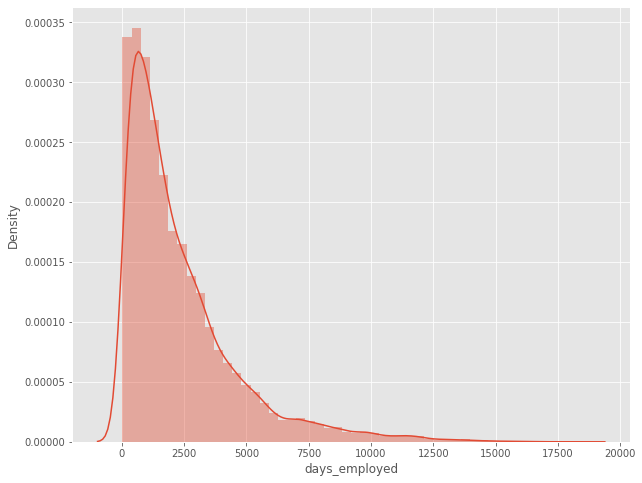

In [749]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df.days_employed)

In [750]:
df['days_employed'].isnull().sum()

2029

In [751]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

In [752]:
df['days_employed'].isnull().sum()

0

In [754]:
df_groupby2 = df.groupby(['gender','education','family_status'])['days_employed'].aggregate('median').unstack()
print(df_groupby3)

family_status               civil partnership  divorced    married  unmarried  \
gender education                                                                
F      bachelor's degree             7.402778  7.341563   7.473525   7.158684   
       graduate degree               7.223288  7.411369  10.766129   6.934251   
       primary education             7.678114  7.903588   8.406144  12.720343   
       secondary education           7.652253  7.793356   7.792750   7.470421   
       some college                  6.855221  6.964156   7.284284   6.412224   
M      bachelor's degree             7.229179  7.462848   7.310949   6.955836   
       graduate degree               7.223288  7.762780  10.657402   6.014204   
       primary education             7.217397  5.996922   7.300853   6.737261   
       secondary education           7.169721  7.411369   7.423911   6.934251   
       some college                  7.045550  6.550558   7.256707   6.625861   

family_status              

In [755]:
df_groupby2 = df_groupby3.fillna(df_groupby3.median())
print(df_groupby3)

family_status               civil partnership  divorced    married  unmarried  \
gender education                                                                
F      bachelor's degree             7.402778  7.341563   7.473525   7.158684   
       graduate degree               7.223288  7.411369  10.766129   6.934251   
       primary education             7.678114  7.903588   8.406144  12.720343   
       secondary education           7.652253  7.793356   7.792750   7.470421   
       some college                  6.855221  6.964156   7.284284   6.412224   
M      bachelor's degree             7.229179  7.462848   7.310949   6.955836   
       graduate degree               7.223288  7.762780  10.657402   6.014204   
       primary education             7.217397  5.996922   7.300853   6.737261   
       secondary education           7.169721  7.411369   7.423911   6.934251   
       some college                  7.045550  6.550558   7.256707   6.625861   

family_status              

**Observations:**
For the days_employed column, it's best to use the median values to replace the missing values rather than the mean. For the categorization, its best fitted to use median values.

## Categorization of data


In [756]:
def debt_group(debt):
    if debt == 0:
        return 'NONE'
    return 'YES'    

In [757]:
df['debt_group'] = df['debt'].apply(debt_group)
print(df.head(10)) 

    children  days_employed  dob_years            education  education_id  \
0          1    8437.673028         42    bachelor's degree             0   
1          1    4024.803754         36  secondary education             1   
2          0    5623.422610         33  secondary education             1   
3          3    4124.747207         32  secondary education             1   
5          0     926.185831         27    bachelor's degree             0   
6          0    2879.202052         43    bachelor's degree             0   
7          0     152.779569         50  secondary education             1   
8          2    6929.865299         35    bachelor's degree             0   
9          0    2188.756445         41  secondary education             1   
10         2    4171.483647         36    bachelor's degree             0   

        family_status  family_status_id gender income_type  debt  \
0             married                 0      F    employee     0   
1             ma

In [758]:
debt_grouped = pd.pivot_table(data=df, index='debt_group', values='debt', aggfunc='count')
print(debt_grouped)

             debt
debt_group       
NONE        16309
YES          1552


In [759]:
total_income_grouped = pd.pivot_table(data=df, index='debt_group', values='total_income', aggfunc='median')
print(total_income_grouped)

            total_income
debt_group              
NONE          24178.6145
YES           24178.6145


**Observations**
<p> To prepare categorizing the loan applicants, I used the grouped table, debt_group, and the column total_income. Since in the grouped table, loan applicants are grouped as to their debt history. If they have debt, they are marked as YES. Otherwhise, NONE. Cross-referencing that with total_income, it shows which group have no debt and the median value of their total income. Thus, it seems both categories have close values which makes our data credible and accurate. Going further, I created a function to determine their risk factor based on the above grouping. 

In [760]:
def debt_group_importance(row):
    debt_group = row['debt_group']
    total_income = row['total_income']

    if debt_group == 'NONE':
        if total_income >= 24943.461:
            return 'NO RISK'
    if debt_group == 'YES':
        if total_income >= 24406.534:
            return 'RISK'
    if debt_group == 'NONE':
        if total_income <= 24943.461:
            return 'RISK'
    if debt_group == 'YES':
        if total_income <= 24406.534:
            return 'CRITICAL RISK'
    return 'MID-RISK'

In [761]:
df['credit_score'] = df.apply(
    debt_group_importance, axis=1
)
print(df['credit_score'].value_counts())

RISK             10021
NO RISK           6922
CRITICAL RISK      918
Name: credit_score, dtype: int64


In [762]:
df.groupby('gender').apply(lambda x: x.sort_values('credit_score'))

children  days_employed  dob_years            education  \
gender                                                                  
F      6203          1     270.660836         50  secondary education   
       1650          2    3976.112832         31  secondary education   
       17508         0     490.838926         33  secondary education   
       4919          0     773.212469         42  secondary education   
       1669          2     421.503725         27  secondary education   
...                ...            ...        ...                  ...   
M      9760          0     467.107777         37  secondary education   
       9763          0    1654.678903         23  secondary education   
       9772          1    2622.968859         40  secondary education   
       9792          0    4095.782180         57  secondary education   
       21523         3    3112.481705         38  secondary education   

              education_id      family_status  family_status_id gender  \
gender                                                                   
F      6203              1            married                 0      F   
       1650              1            married                 0      F   
       17508             1            married                 0      F   
       4919              1  civil partnership                 1      F   
       1669              1            married                 0      F   
...                    ...                ...               ...    ...   
M      9760              1            married                 0      M   
       9763              1          unmarried                 4      M   
       9772              1            married                 0      M   
       9792              1  civil partnership                 1      M   
       21523             1            married                 0      M   

             income_type  debt  total_income                       purpose  \
gender                                                                       
F      6203     employee     1     14347.062                  to buy a car   
       1650     employee     1     17772.322         purchase of the house   
       17508    employee     1     15124.713                           car   
       4919     employee     1     19347.263              having a wedding   
       1669     employee     1     14101.847                       housing   
...                  ...   ...           ...                           ...   
M      9760     business     0     20073.922                  car purchase   
       9763     employee     0     21513.737  construction of own property   
       9772     employee     1     26632.140      buying a second-hand car   
       9792     employee     0     14436.494             to have a wedding   
       21523    employee     1     39054.888             buying my own car   

             age_group debt_group   credit_score  
gender                                            
F      6203      Adult        YES  CRITICAL RISK  
       1650      Adult        YES  CRITICAL RISK  
       17508     Adult        YES  CRITICAL RISK  
       4919      Adult        YES  CRITICAL RISK  
       1669      Adult        YES  CRITICAL RISK  
...                ...        ...            ...  
M      9760      Adult       NONE           RISK  
       9763      Adult       NONE           RISK  
       9772      Adult        YES           RISK  
       9792      Adult       NONE           RISK  
       21523     Adult        YES           RISK  

[17861 rows x 15 columns]

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

Nice approach to clasify according to income and actual debt category.
</div>

**How does credit purpose affect the default rate?**

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>

For the next section you'll use the purpose `column` to know what type of correlation it has with paying back on time. For that, you have to categorize the `purpose` column, which has too many different values. Group those when they are refering to the same thing, for example 'wedding ceremony' and 'having a wedding' are the same purpose so you could create a category 'wedding'.
</div>

In [763]:
df['purpose'].sort_values().unique()

array(['building a property', 'building a real estate',
       'buy commercial real estate', 'buy real estate',
       'buy residential real estate', 'buying a second-hand car',
       'buying my own car', 'buying property for renting out', 'car',
       'car purchase', 'cars', 'construction of own property',
       'education', 'getting an education', 'getting higher education',
       'going to university', 'having a wedding', 'housing',
       'housing renovation', 'housing transactions', 'profile education',
       'property', 'purchase of a car', 'purchase of my own house',
       'purchase of the house', 'purchase of the house for my family',
       'real estate transactions', 'second-hand car purchase',
       'supplementary education', 'to become educated', 'to buy a car',
       'to get a supplementary education', 'to have a wedding',
       'to own a car', 'transactions with commercial real estate',
       'transactions with my real estate', 'university education',
       'we

In [764]:
def replace_wrong_purposes(wrong_purposes, correct_purposes): 
    for wrong_purpose in wrong_purposes: 
        df['purpose'] = df['purpose'].replace(wrong_purpose, correct_purposes)

In [765]:
duplicates = ['building a real estate', 'buy commercial real estate', 'buy residential real estate', 'real estate transactions', 'transactions with commercial real estate', 'transactions with my real estate'] 
name = 'buy real estate'
duplicates1 = ['car', 'cars', 'buying a second-hand car', 'buying my own car', 'to buy a car', 'purchase of a car', 'second-hand car purchase', 'to own a car']
name = 'car purchase'
duplicates2 = ['education', 'getting higher education', 'going to university', 'supplementary education', 'profile education', 'to become educated', 'to get a supplementary education', 'university education']
name = 'getting an education'
duplicates3 = ['having a wedding', 'to have a wedding', 'wedding ceremony']
name ='wedding'
duplicates4 = ['housing renovation', 'housing transactions', 'property', 'buying property for renting out', 'construction of my own property', 'purchase of my own house', 'purchase of the house', 'purchase of the house for my family', '']
name='housing'
replace_wrong_purposes(duplicates, name)
replace_wrong_purposes(duplicates1, name)
replace_wrong_purposes(duplicates2, name)
replace_wrong_purposes(duplicates3, name)
replace_wrong_purposes(duplicates4, name)
print(df['purpose'].sort_values().unique())

['building a property' 'buy real estate' 'car purchase'
 'construction of own property' 'getting an education' 'housing']


In [766]:
df['purpose'].dtype

dtype('O')

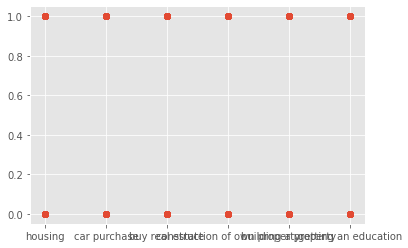

In [768]:
plt.scatter(df['purpose'], df['debt'])
plt.show()

In [813]:
pivot_table_purpose = df.pivot_table(index='purpose', columns= 'debt', values='days_employed', aggfunc='count')
pivot_table_purpose['rate_of_late_payement'] = pivot_table_purpose[1] / (pivot_table_purpose[1] + pivot_table_purpose[0]) * 100
print(pivot_table_purpose)

debt                              0     1  rate_of_late_payement
purpose                                                         
building a property             474    48               9.195402
buy real estate                 477    37               7.198444
car purchase                    342    39              10.236220
construction of own property    496    36               6.766917
getting an education            333    32               8.767123
housing                       14187  1360               8.747668


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v4</b> <a class="tocSkip"></a>

Could you please exaplin this comment in more detail? I did not understand what you explained. Also the code above doesn't run.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    <p>As to the purpose of making a loan, purchasing a car has a higher rate which is at 10% while the lowest rate goes to real estate with 7%. The range of rates (7% to 9%) are close to each other.</p>

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?** default rate = customers who didn't repay the debt / all customers

In [814]:
df['children'].isnull().sum()

0

In [815]:
df['children'].corr(df['debt'])

0.015714128468013816

<AxesSubplot:xlabel='children', ylabel='Density'>

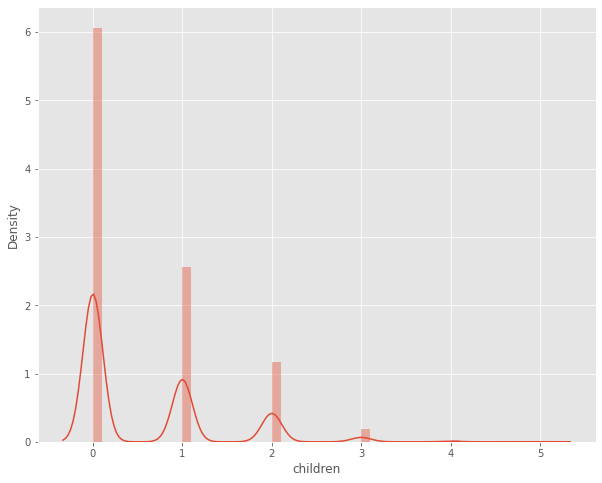

In [816]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df.children)

In [817]:
df_children = df.query("children == 5")
print(df_children)

       children  days_employed  dob_years            education  education_id  \
3979          5    1630.691372         42  secondary education             1   
4397          5    3248.839837         36  secondary education             1   
7866          5     773.124856         36  secondary education             1   
15822         5     418.199982         31  secondary education             1   
15916         5    2286.262752         37  secondary education             1   
16211         5     387.317579         35  secondary education             1   
20452         5     268.425464         38    primary education             3   
20837         5    2386.600221         35  secondary education             1   
21156         5    1690.018117         59  secondary education             1   

           family_status  family_status_id gender    income_type  debt  \
3979   civil partnership                 1      M       employee     0   
4397             married                 0      F  

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3</b> <a class="tocSkip"></a>


In this section you should compare a rate of not paying in time accross categories. Please try this:
    
 - `pivot_table_children = data.pivot_table(index='children', columns= 'debt', values='days_employed', aggfunc='count')`
 - `pivot_table_children['rate_of_late_payement'] = pivot_table_children[1] / (pivot_table_children[1] + pivot_table_children[0]) * 100`
 - Compare the rates among categories of number of children. When number of children grows, does the rate of late payment grow too?
    
Please follow similar steps for all hypothesis.
</div>

In [818]:
pivot_table_children = df.pivot_table(index='children', columns= 'debt', values='days_employed', aggfunc='count')
pivot_table_children['rate_of_late_payment'] = pivot_table_children[1] / (pivot_table_children[1] + pivot_table_children[0]) * 100
print(pivot_table_children)

debt           0      1  rate_of_late_payment
children                                     
0         9942.0  892.0              8.233339
1         4139.0  430.0              9.411250
2         1887.0  200.0              9.583134
3          296.0   26.0              8.074534
4           36.0    4.0             10.000000
5            9.0    NaN                   NaN


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
<p> As to the number of children influeince rate of late payment, having more children increases its rate to 10% while the lowest rate goes to having no children with 8%. The range of rates (8% to 10%) of the listed purposes are close to each other. </p> 

**Is there a correlation between family status and paying back on time?**

In [819]:
pivot_table_family_status = df.pivot_table(index='family_status', columns= 'debt', values='days_employed', aggfunc='count')
pivot_table_family_status['rate_of_late_payment'] = pivot_table_family_status[1] / (pivot_table_family_status[1] + pivot_table_family_status[0]) * 100
print(pivot_table_family_status)

debt                  0    1  rate_of_late_payment
family_status                                     
civil partnership  3175  357             10.107588
divorced            914   74              7.489879
married            9557  829              7.981899
unmarried          2221  261             10.515713
widow / widower     442   31              6.553911


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
<p> As to family status making an impact to the rate of late payment, unmarried or single loan applicants has a higher rate which is at 10% while the lowest rate goes to widow or widower with 6%. The range of rates (6% to 10%) are close to each other.</p> 

**Is there a correlation between income level and paying back on time?**

In [859]:
df['total_income'].corr(df['debt'])

-0.020899473833803136

In [860]:
pivot_table_income_level = df.pivot_table(index='total_income', columns= 'debt', values='days_employed', aggfunc='count')
pivot_table_income_level['rate_of_late_payment'] = pivot_table_income_level[1] / (pivot_table_income_level[1] + pivot_table_income_level[0]) * 100
print(pivot_table_income_level)

debt            0    1  rate_of_late_payment
total_income                                
3418.824      1.0  NaN                   NaN
4036.463      1.0  NaN                   NaN
4212.770      1.0  NaN                   NaN
4245.348      1.0  NaN                   NaN
4494.861      1.0  NaN                   NaN
...           ...  ...                   ...
273809.483    1.0  NaN                   NaN
274402.943    1.0  NaN                   NaN
276204.162    1.0  NaN                   NaN
352136.354    NaN  1.0                   NaN
362496.645    1.0  NaN                   NaN

[15832 rows x 3 columns]


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
<p> There's no correlation of the income level and paying back in time.</p> 

**Conclusion**

Based on my computations, the age groupings determines how likely the loan applicants will pay back their loan. 

# General Conclusion 


In [861]:
print(df['credit_score'].value_counts())

RISK             10021
NO RISK           6922
CRITICAL RISK      918
Name: credit_score, dtype: int64


After processing and manipulating the data to be credible and accurate, I came up with the table above to determine loan applicants and their risk in paying back their loan as the determining factor. There are more loan applicants who are classified as AT RISK. This means that the loan applicants with RISK are able to pay back their loan but with difficulties along the way. It seems that age group has more correlation to their ability to pay back their loan other than family status, the number of children, and the purpose of their loan. 